In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [4]:
ds_hmeq = pd.read_csv("./csvfiles/HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
np.random.seed(seed=1234)
msk = np.random.rand(ds_hmeq.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq[msk]
ds_hmeq_test = ds_hmeq[~msk]
print("train {}".format(ds_hmeq_train.shape))
print("test {}".format(ds_hmeq_test.shape))

train (2604, 13)
test (1144, 13)


In [7]:
ds_hmeq_train_constant = sm.add_constant(ds_hmeq_train)
ds_hmeq_train_constant.head()

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1.0,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,1.0,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
5,1.0,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,1.0,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859


In [16]:
log_model = sm.Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB)+YOJ+DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC+1", ds_hmeq_train_constant)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2328
Method:                           MLE   Df Model:                           16
Date:                Thu, 31 Jan 2019   Pseudo R-squ.:                  0.2272
Time:                        17:21:04   Log-Likelihood:                -546.40
converged:                       True   LL-Null:                       -707.02
                                        LLR p-value:                 1.001e-58
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.1620      0.565     -9.134      0.000      -6.270      -4.054

In [17]:
y_pred = log_result.predict(ds_hmeq_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

3    0
4    0
7    1
8    0
9    0
dtype: int64

In [19]:
# 평가
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(ds_hmeq_test["BAD"],y_pred_class)))

Accuracy : 0.924


<Figure size 1080x576 with 0 Axes>

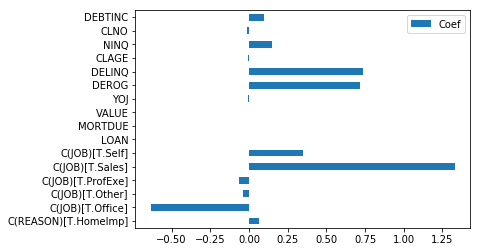

In [22]:
plt.figure(figsize = (15,8))
ds_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y="Coef")

In [23]:
from sklearn.preprocessing import scale

In [27]:
ds_hmeq_char = ds_hmeq.select_dtypes(include='object')
ds_hmeq_numeric = ds_hmeq.select_dtypes(exclude='object')
# Data Scale
ds_hmeq_char_train = ds_hmeq_char[msk]
ds_hmeq_numeric_sclaed_train = scale(ds_hmeq_numeric[msk])
ds_hmeq_numeric_sclaed_train = pd.DataFrame(ds_hmeq_numeric_sclaed_train, columns=ds_hmeq_numeric.columns)
ds_hmeq_numeric_sclaed_train.head()

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.124153,-1.546445,-0.994709,-1.225371,-0.020164,-0.26517,-0.336364,-0.957703,-0.019878,-1.424138,0.372555
1,3.124153,-1.537818,-1.040082,-1.175827,0.243350,-0.26517,-0.336364,-1.111686,-0.658952,-1.424138,0.344145
2,-0.320087,-1.494683,0.598052,0.246573,-0.942462,-0.26517,-0.336364,-1.084690,-0.658952,-0.898712,-0.313747
3,-0.320087,-1.442920,0.633069,0.092356,-1.074219,-0.26517,-0.336364,-1.022736,-0.658952,-0.898712,-0.504711
4,-0.320087,-1.442920,0.642472,0.241991,-0.942462,-0.26517,-0.336364,-0.956802,-0.658952,-0.898712,-0.521514


In [28]:
ds_hmeq_numeric_sclaed_train["BAD"] = np.where(ds_hmeq_numeric_sclaed_train["BAD"] > 0, 1, 0)
ds_hmeq_numeric_sclaed_train.head()

# scale된 숫자형 데이터와 범주형 데이터 결합
ds_hmeq_scaled_train = pd.concat([ds_hmeq_numeric_sclaed_train, ds_hmeq_char_train.reset_index(drop=True)], axis = 1)

Optimization terminated successfully.
         Current function value: 0.233005
         Iterations 7


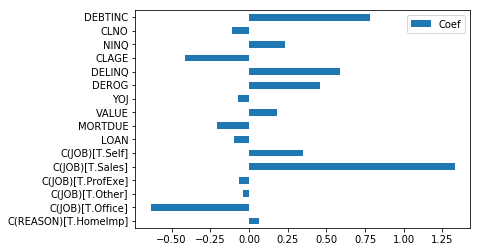

In [29]:
scaled_log_model = sm.Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB)+YOJ+DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC+1", ds_hmeq_scaled_train)
#적합
scaled_log_result = scaled_log_model.fit()
# 설명 변수 중요도
ds_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index=scaled_log_model.exog_names[1:])
ds_log_scaled_coef.plot.barh(y="Coef")